**About:** This notebook contains the experiment to cluster the  
(TPHYSTND,PHQ) and find the corresponding (SOLIN,PS,LHFLX,SHFLX) on the normalized version of the dataset.

# Imports

In [1]:
from backend.imports import *
from backend.utils import *
from backend.data_generator import DataGenerator
from sklearn.cluster import MiniBatchKMeans
import joblib

# Data Transformations

In [2]:
TRAINDIR = '/oasis/scratch/comet/ankitesh/temp_project/PrepData/'
path = '/home/ankitesh/PDE/CbrainPDE/backend/constDicts/'
path_hyam = 'hyam_hybm.pkl'
MODEL_DIR = '/oasis/scratch/comet/ankitesh/temp_project/PDEModels/'

hf = open(path+path_hyam,'rb')
hyam,hybm = pickle.load(hf)
scale_dict = load_pickle('/home/ankitesh/PDE/CbrainPDE/backend/constDicts/009_Wm2_scaling.pkl')

In [3]:
PHQ_idx = slice(0,30)
TPHYSTND_idx = slice(30,60)

In [4]:
batch_size = 10000

### Load the dataset

In [5]:
TRAINFILE = 'CI_SP_M4K_train_shuffle.nc'
NORMFILE = 'CI_SP_M4K_NORM_norm.nc'
VALIDFILE = 'CI_SP_M4K_valid.nc'

in_vars = ['QBP','TBP','PS', 'SOLIN', 'SHFLX', 'LHFLX']
out_vars = ['PHQ','TPHYSTND','FSNT', 'FSNS', 'FLNT', 'FLNS']

In [6]:
train_data_m4k =  DataGenerator(
    data_fn = TRAINDIR+TRAINFILE,
    input_vars = in_vars,
    output_vars = out_vars,
    norm_fn = TRAINDIR+NORMFILE,
    input_transform = ('mean', 'maxrs'),
    output_transform = scale_dict,
    batch_size=batch_size,
    shuffle=True,
    normalize_flag=True
)

# Model

We are going to cluster on the basis of PHQ and TPHYSTND

In [7]:
n_batches = train_data_m4k.n_batches
clusters = range(1,10)
inertia = []
#Also save the models

In [8]:
for n_clusters in clusters:
    print("n_clusters: "+str(n_clusters))
    kmeans = MiniBatchKMeans(n_clusters=n_clusters,random_state=0,batch_size=n_batches)    
    for i in tqdm(range(train_data_m4k.n_batches)):
        Y = train_data_m4k[i][1]
        PHQ = Y[:,PHQ_idx].mean(axis=1)
        TPHYSTND = Y[:,TPHYSTND_idx].mean(axis=1)
        X = np.vstack((PHQ,TPHYSTND)).T
        kmeans = kmeans.partial_fit(X)
    inertia.append(kmeans.inertia_)
    save_pickle_model(MODEL_DIR+"PHQ_TPH_mean_K_"+str(n_clusters)+".pkl",kmeans)

n_clusters: 1


/home/ankitesh/miniconda3/envs/PDE-Net/lib/python3.6/site-packages/ipykernel_launcher.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  after removing the cwd from sys.path.


KeyboardInterrupt: 

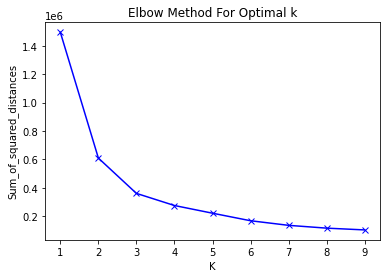

In [33]:
plt.plot(clusters, inertia, 'bx-')
plt.xlabel('K')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

K = 2 or 3 would be better

**Train the clusters on 60 dimensions (PHQ,TPHYSTND)**

In [18]:
normalize_flag = True
mean = train_data_m4k.norm_ds['mean'][64:124].values
inertia = []

In [ ]:
for n_clusters in clusters:
    print("n_clusters: "+str(n_clusters))
    kmeans = MiniBatchKMeans(n_clusters=n_clusters,random_state=0,batch_size=n_batches)  
    for i in tqdm(range(train_data_m4k.n_batches)):
        Y = train_data_m4k[i][1]
        #inverse scale and then subtrac mean and then scale
        Y = train_data_m4k.output_transform.inverse_transform(Y)
        Y[:,:60] = Y[:,:60] - mean
        Y = train_data_m4k.output_transform.transform(Y)
        X = Y[:,:60] #PHQ-TPHYSTND
        kmeans = kmeans.partial_fit(X)
    inertia.append(kmeans.inertia_)
    save_pickle_model(MODEL_DIR+"PHQTPH_normalized_K_"+str(n_clusters)+".pkl",kmeans)

n_clusters: 1


/home/ankitesh/miniconda3/envs/PDE-Net/lib/python3.6/site-packages/ipykernel_launcher.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  after removing the cwd from sys.path.



n_clusters: 2


/home/ankitesh/miniconda3/envs/PDE-Net/lib/python3.6/site-packages/ipykernel_launcher.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  after removing the cwd from sys.path.



n_clusters: 3


/home/ankitesh/miniconda3/envs/PDE-Net/lib/python3.6/site-packages/ipykernel_launcher.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  after removing the cwd from sys.path.



n_clusters: 4


/home/ankitesh/miniconda3/envs/PDE-Net/lib/python3.6/site-packages/ipykernel_launcher.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  after removing the cwd from sys.path.



n_clusters: 5


/home/ankitesh/miniconda3/envs/PDE-Net/lib/python3.6/site-packages/ipykernel_launcher.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  after removing the cwd from sys.path.



n_clusters: 6


/home/ankitesh/miniconda3/envs/PDE-Net/lib/python3.6/site-packages/ipykernel_launcher.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  after removing the cwd from sys.path.



n_clusters: 7


/home/ankitesh/miniconda3/envs/PDE-Net/lib/python3.6/site-packages/ipykernel_launcher.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  after removing the cwd from sys.path.



n_clusters: 8


/home/ankitesh/miniconda3/envs/PDE-Net/lib/python3.6/site-packages/ipykernel_launcher.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  after removing the cwd from sys.path.



n_clusters: 9


/home/ankitesh/miniconda3/envs/PDE-Net/lib/python3.6/site-packages/ipykernel_launcher.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  after removing the cwd from sys.path.


In [ ]:
plt.plot(clusters, inertia, 'bx-')
plt.xlabel('K')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

# Diagnositics

Plotting the clusters and some datapoints

/home/ankitesh/miniconda3/envs/PDE-Net/lib/python3.6/site-packages/ipykernel_launcher.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


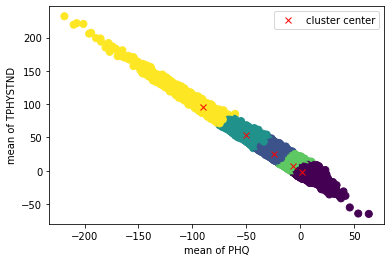

In [69]:
#plot 100000 data points i.e 
for i in tqdm(range(int(1000000/batch_size))):
    Y = train_data_m4k[i][1]
    PHQ = Y[:,PHQ_idx].mean(axis=1)
    TPHYSTND = Y[:,TPHYSTND_idx].mean(axis=1)
    X = np.vstack((PHQ,TPHYSTND)).T
    pred = kmeans.predict(X)
    plt.scatter(X[:,0],X[:,1],c=pred, s=50, cmap='viridis')
plt.plot(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],'x',c='r')
plt.xlabel("mean of PHQ")
plt.ylabel("mean of TPHYSTND")
plt.legend(['cluster center'])